In [20]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

alpha = 3
beta = 2
gama = 2
N = 100000
m = 100
f = lambda x: x**2/16*np.exp(-x/2)

### A. p=f(x)

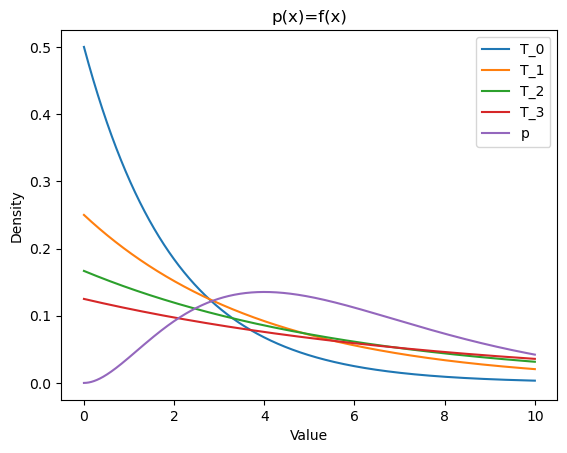

In [15]:
#A分布分析
gamas = [2, 4, 6, 8]
T_0 = lambda x: 1/gamas[0]*np.exp(-x/gamas[0])
T_1 = lambda x: 1/gamas[1]*np.exp(-x/gamas[1])
T_2 = lambda x: 1/gamas[2]*np.exp(-x/gamas[2])
T_3 = lambda x: 1/gamas[3]*np.exp(-x/gamas[3])
p = f

x = np.linspace(0, 10, 10000)

plt.plot(x, T_0(x), label='T_0')
plt.plot(x, T_1(x), label='T_1')
plt.plot(x, T_2(x), label='T_2')
plt.plot(x, T_3(x), label='T_3')
plt.plot(x, p(x), label='p')


# 添加图例和标签
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("p(x)=f(x)")

# 显示图形
plt.show()

In [21]:
for gama in [2, 4, 6, 8]:
    X = np.zeros(N)
    X[0] = 1
    num_sample = 0
    #monte carlo取样
    for i in range(N-1):
        R = random.uniform(0, 1)
        x = -gama*math.log(R)
        r = (x/X[i])**(alpha-1)*math.exp((x-X[i])*(1/gama-1/beta))
        if random.uniform(0, 1)<min(1,r):
            X[i+1] = x
            num_sample += 1
        else:
            X[i+1] = X[i]

    #积分

    I = np.sum((X[m:]-alpha*beta)**2)/(N-m)
    error = abs(I-alpha*beta**2)
    
    sample_rate = num_sample/(N-1)

    print("gama为{}时,误差为{},效率为{}\n".format(gama,error,sample_rate))


gama为2时,误差为0.931791352431528,效率为0.25153251532515325

gama为4时,误差为0.006079842636086852,效率为0.5628756287562876

gama为6时,误差为0.0034340305475062394,效率为0.6375663756637566

gama为8时,误差为0.009723314666597815,效率为0.6097860978609786



### B. p=(x-ab)^2*f(x)

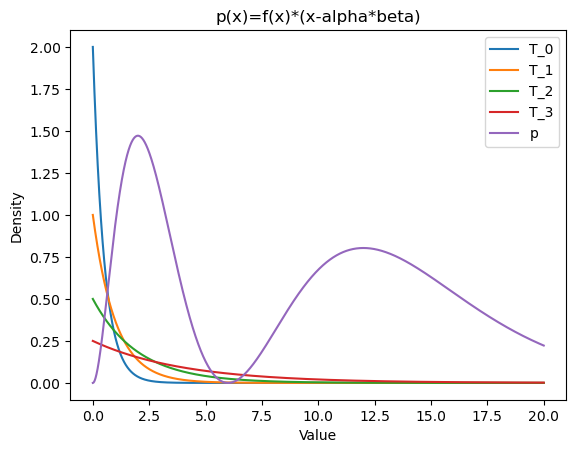

In [16]:
#B分布分析
gamas = [0.5, 1, 2, 4]
T_0 = lambda x: 1/gamas[0]*np.exp(-x/gamas[0])
T_1 = lambda x: 1/gamas[1]*np.exp(-x/gamas[1])
T_2 = lambda x: 1/gamas[2]*np.exp(-x/gamas[2])
T_3 = lambda x: 1/gamas[3]*np.exp(-x/gamas[3])
p = lambda x: f(x)*(x-alpha*beta)**2

x = np.linspace(0, 20, 10000)

plt.plot(x, T_0(x), label='T_0')
plt.plot(x, T_1(x), label='T_1')
plt.plot(x, T_2(x), label='T_2')
plt.plot(x, T_3(x), label='T_3')
plt.plot(x, p(x), label='p')


# 添加图例和标签
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("p(x)=f(x)*(x-alpha*beta)")

# 显示图形
plt.show()

In [31]:
for gama in [0.5, 1, 2, 4, 6, 8, 10]:
    X = np.zeros(N)
    X[0] = 1
    num_sample = 0
    #monte carlo取样
    for i in range(N-1):
        R = random.uniform(0, 1)
        x = -gama*math.log(R)
        r = (x/X[i])**(alpha-1)*math.exp((x-X[i])*(1/gama-1/beta))*(x-alpha*beta)**2/(X[i]-alpha*beta)**2
        if random.uniform(0, 1)<min(1,r):
            X[i+1] = x
            num_sample += 1
        else:
            X[i+1] = X[i]

    #生成分布函数g(xi),并舍去分布概率太小的xi
    Xi = []
    G = []
    hist, bins = np.histogram(X, bins=5000, density=True, range = (0,50))
    for i in range(N):
        if X[i]>50:
            continue
        index = round(X[i]*100)
        g = hist[index]
        if g>0.005:
            Xi.append(X[i])
            G.append(g)
    
    print("有效抽样点数：{}".format(len(G)))
    
    #积分
    I = 0
    for i in range(len(G)):
        I += p(Xi[i])/G[i]
    I = I/len(G)
    error = abs(I-alpha*beta**2)
    
    sample_rate = num_sample/(N-1)

    print("gama为{}时,误差为{},效率为{}\n".format(gama,error,sample_rate))

有效抽样点数：94379
gama为0.5时,误差为6.8339755229682195,效率为0.09306093060930609

有效抽样点数：84725
gama为1时,误差为6.644978084262902,效率为0.16950169501695017

有效抽样点数：79242
gama为2时,误差为1.3849481002861292,效率为0.1993719937199372

有效抽样点数：96668
gama为4时,误差为1.0232615971510128,效率为0.34052340523405233

有效抽样点数：97888
gama为6时,误差为0.43116737865270593,效率为0.47403474034740345

有效抽样点数：98016
gama为8时,误差为0.32413900245912686,效率为0.5407954079540795

有效抽样点数：98098
gama为10时,误差为0.3055004209647407,效率为0.5659656596565966

